## **Notebook EC04 (Part A)**
## MLP classifier for the MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Daniele Souza Gonçalves RA:248029


In [ ]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2110 - accuracy: 0.9360
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0983 - accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0724 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0594 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0502 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0347 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0361 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0332 - accuracy: 0.9891
Epoch 10/10
1875/1875 [==============================] - 23s 12m

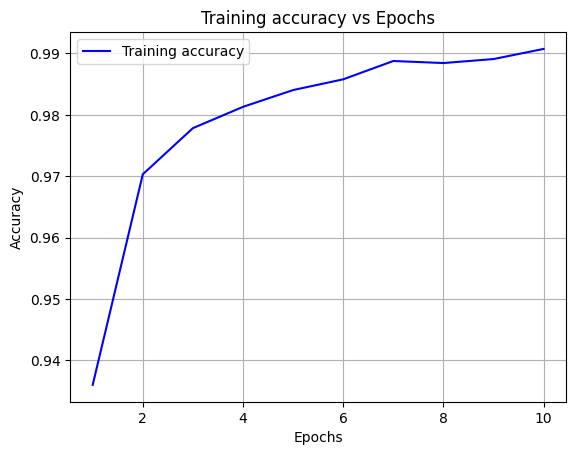

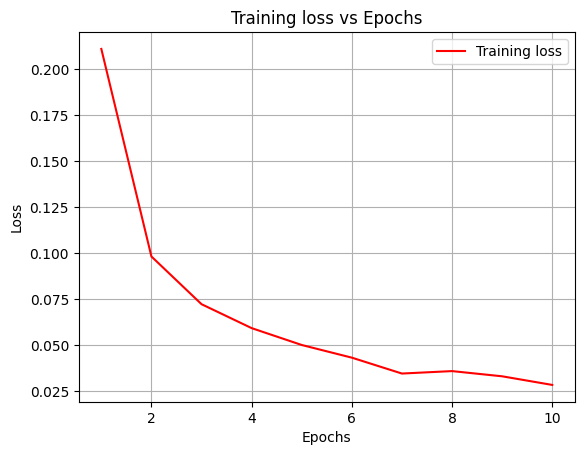

In [ ]:
# Plotting
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy vs Epochs')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss vs Epochs')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
model_json = model.to_json()
json_file = open("model_MLP.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/content'

In [ ]:
#Repetindo para o CIFAR-10

import tensorflow as tf
import os
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.0006 - accuracy: 0.2801
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8664 - accuracy: 0.3191
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8306 - accuracy: 0.3336
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8039 - accuracy: 0.3473
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.7839 - accuracy: 0.3547
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.7715 - accuracy: 0.3588
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.7590 - accuracy: 0.3646
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.7540 - accuracy: 0.3659
Epoch 9/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7424 - accuracy: 0.3710
Epoch 10/10
1563/1563 [==============================] - 69s 44m

Respostas

MNIST

Com as configurações originais a MLP atingia um desempenho 90,62% de acurácia. Foram feitas algumas tentativas variando o número de neuronios na camada oculta, o dropout e o número de épocas buscando uma opção que superasse o desempenho original.
Inicialmente subimos apenas o número de neuronios na camada oculta para 1024 e com isso a acurácia subiu para 98,3, no entanto, conforme observado tanto na prática como em pesquisas na internet, aumentar o  número de unidades nessa camada não aumenta signficativamente o desempenho da MLP apesar de aumentar o seu custo de processamento.

O próximo passo foi manter a dense layer em 1024 e variar apenas o dropout, no entanto o ganho da acurácia variando o dropout para 0.3,0.4 e 0.5 foi muito baixo variando menos de 1%.

Por último, mantendo a dense layer em 1024, o dropout em 0.3 e variando o número de épocas em 10,20 e 30 chegou-se a conclusão de que o melhor desempenho é para o número de épocas igual a 10. Portanto, o melhor desempenho foi para dense_layer = 1024, dropout = 0.3 e epochs = 10

CIFAR-10

Começando pelas configurações originais obtivemos 38,58%  de acurácia no conjunto de teste. Refizemos as mesmas simulações do MNIST e chegamos que o melhor desempenho também foi para dense_layer = 1024, dropout = 0.3 e epochs = 10,

Entretanto, apesar dos mesmos parâmetros serem os indicados é notável a diferença de desempenho sendo 98,07 % para o MNIST e para 41,63% o CIFAR-10. O que pode ser explicado devido a complexidade do último conjunto representada pelas rotações de imagens e por estas serem coloridas.